# Analysis of Range of Models Experiment-2: Range of LLM models

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from game_analysis.data_processing import combine_game_results, load_game_state_from_folder, load_player_data_from_folder, \
        process_json_files_in_folder, calculate_troop_strength_over_time, \
            calculate_territory_control_over_time, \
                calculate_territory_ownership, binomial_test_p_value, \
                territory_troop_control_over_time
from game_analysis.visualizations import plot_wins_by_victory_condition, \
    plot_many_stacked_area_charts, plot_many_line_plots, \
    plot_average_troop_strength, plot_average_territory_control, \
    plot_average_troop_strength, plot_errors_over_time, \
    plot_accumulated_turn_time, creat_full_heatmap_plot

from constants import continent_mapping, TERRITORIES_ORDERED_BY_CONTINENTS



os.getcwd()   

'/app/game_analysis'

In [2]:
data_folder = "../game_results/experiment2_range_of_models"

In [3]:
# Define the player-to-color mapping
player_colors = {
    "gpt-4o": "#0072B2",  # Blue
    "Claude_Sonnet_3_5": "#E69F00",             # Orange
    "llama3.1_70": "#009E73"         # Green
}
# Define the player-to-color mapping
player_colors = {
    "Strong(gpt-4o)": "#0072B2",  # Blue
    "Medium(gpt-4o-mini)": "#E69F00",             # Orange
    "Weak(gpt-3.5-turbo)": "#009E73"         # Green
}  			



#### Statistical test on likelihood of outcome

In [3]:
from scipy.stats import chisquare

# Observed wins for the three models
observed = [7, 3, 0]

# Expected wins under the null hypothesis (equal probability)
expected_wins = [0.45 * 10, 0.45 * 10, 0.1 * 10]  # 4, 4, and 2 expected wins

# Perform the chi-square goodness-of-fit test
chi2_statistic, p_value = chisquare(f_obs=observed, f_exp=expected_wins)

chi2_statistic, p_value

(2.8888888888888890, .23587708298570023)

(np.float64(2.888888888888889), np.float64(0.23587708298570023))

#### Load the data

In [4]:
# this shows the player data, like all the errors and time spent on their games
experiment2_player_data_df = combine_game_results(load_player_data_from_folder, data_folder)
experiment2_game_data_df = combine_game_results(load_game_state_from_folder, data_folder)
experiment_2_results_df =   combine_game_results(process_json_files_in_folder, data_folder)


#### Transform to create data for visualizations

In [5]:
troops_and_territory_over_time_df = territory_troop_control_over_time(experiment2_game_data_df)


#### Visualizations

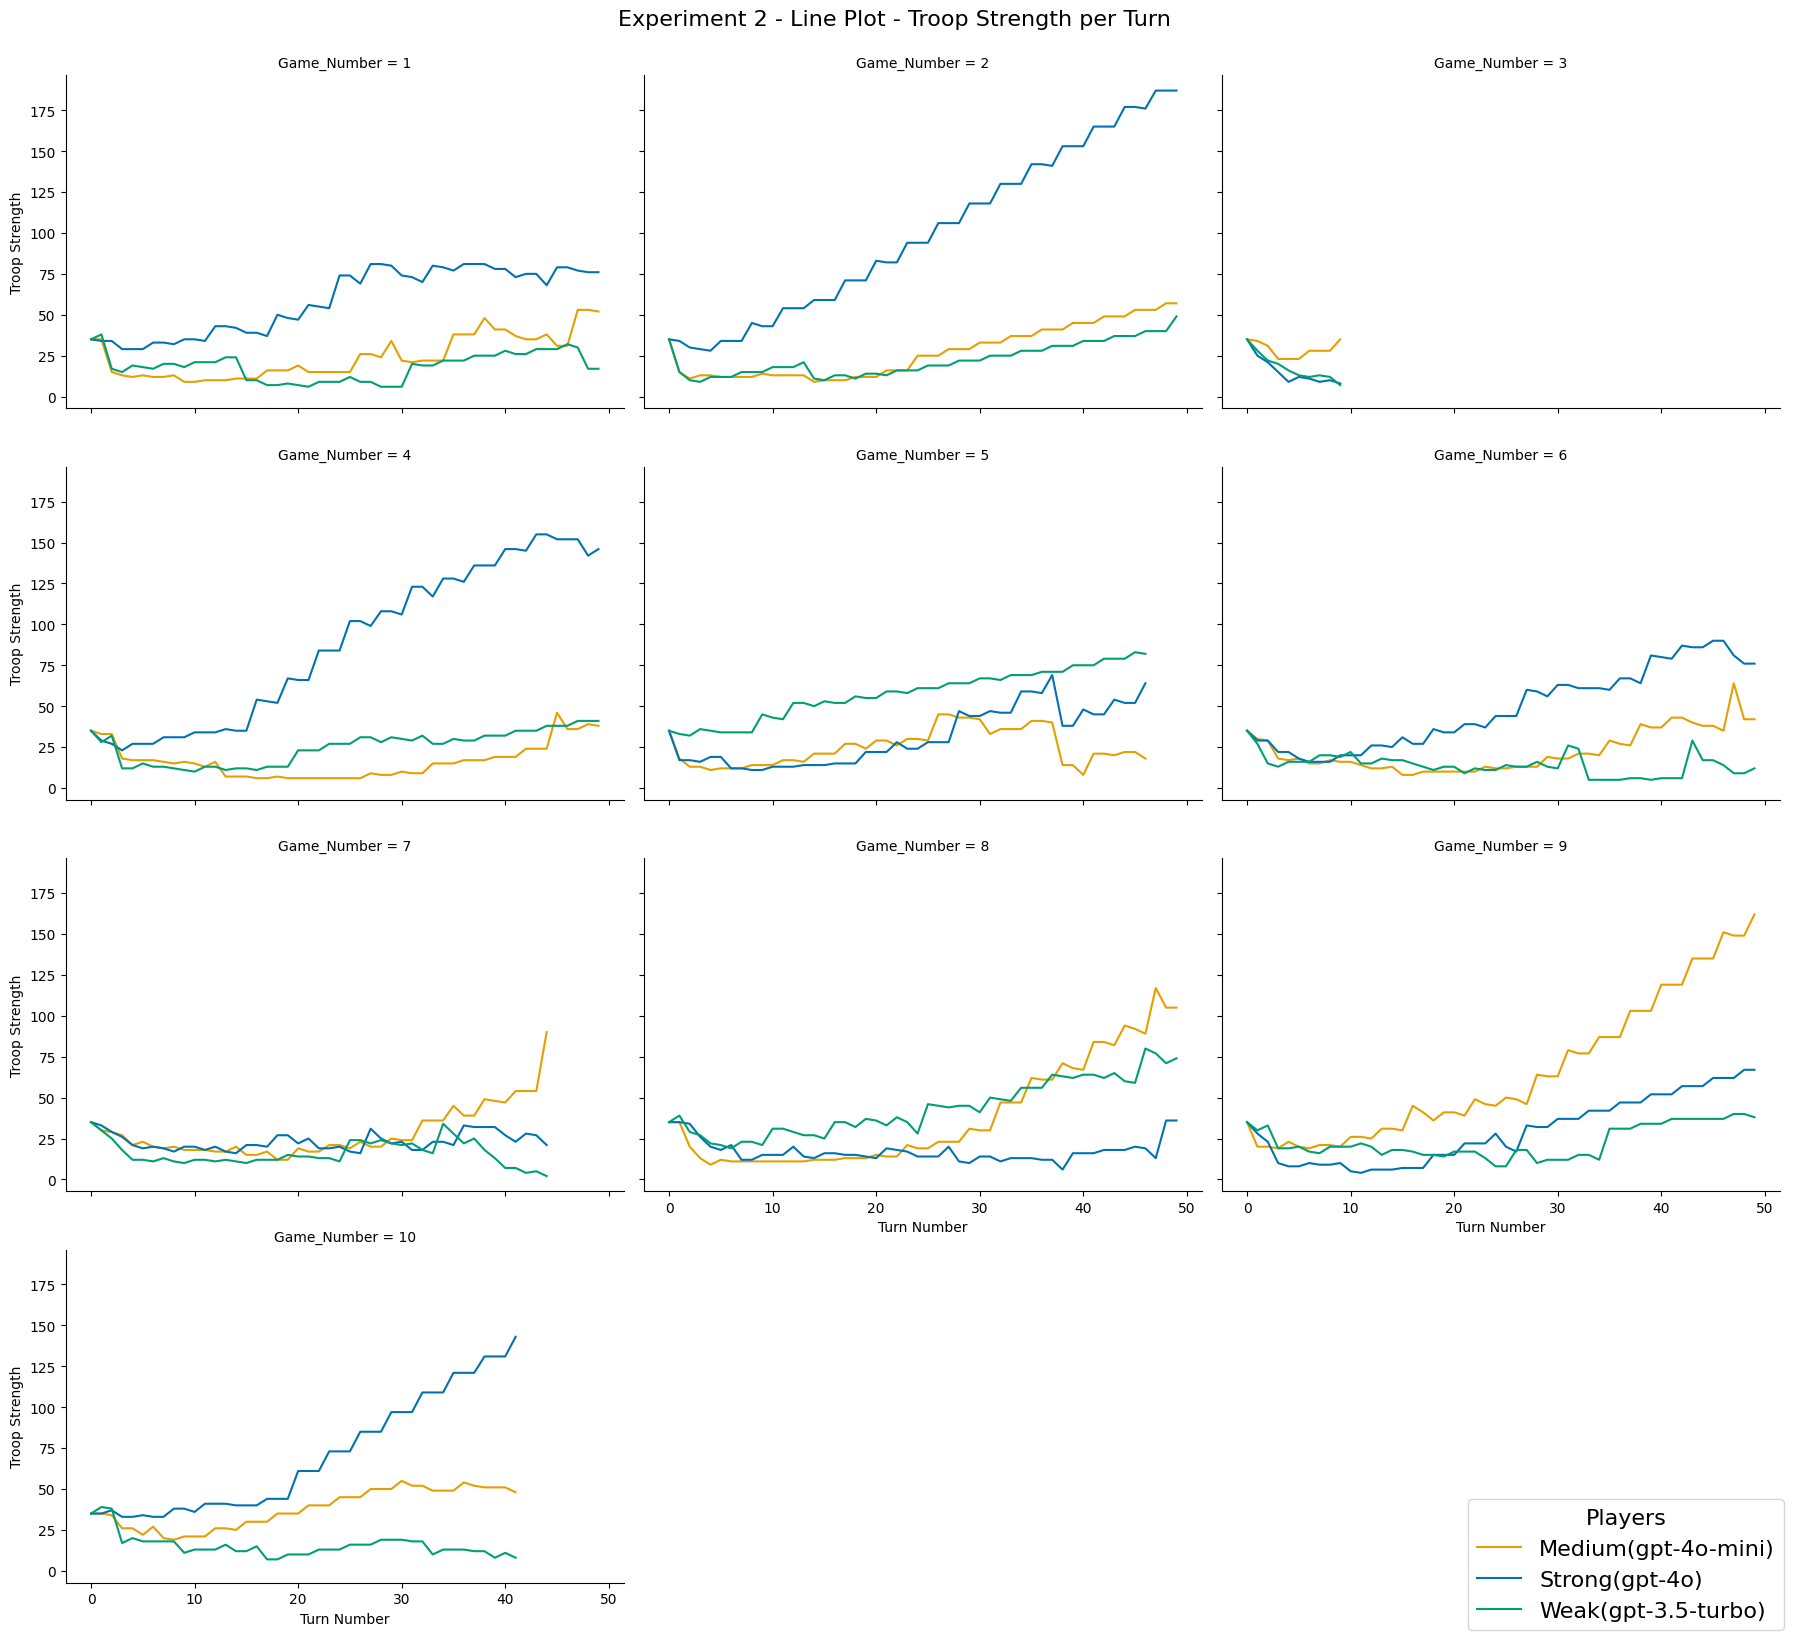

In [6]:
plot_many_line_plots(troops_and_territory_over_time_df,
        player_colors, "Experiment 2")

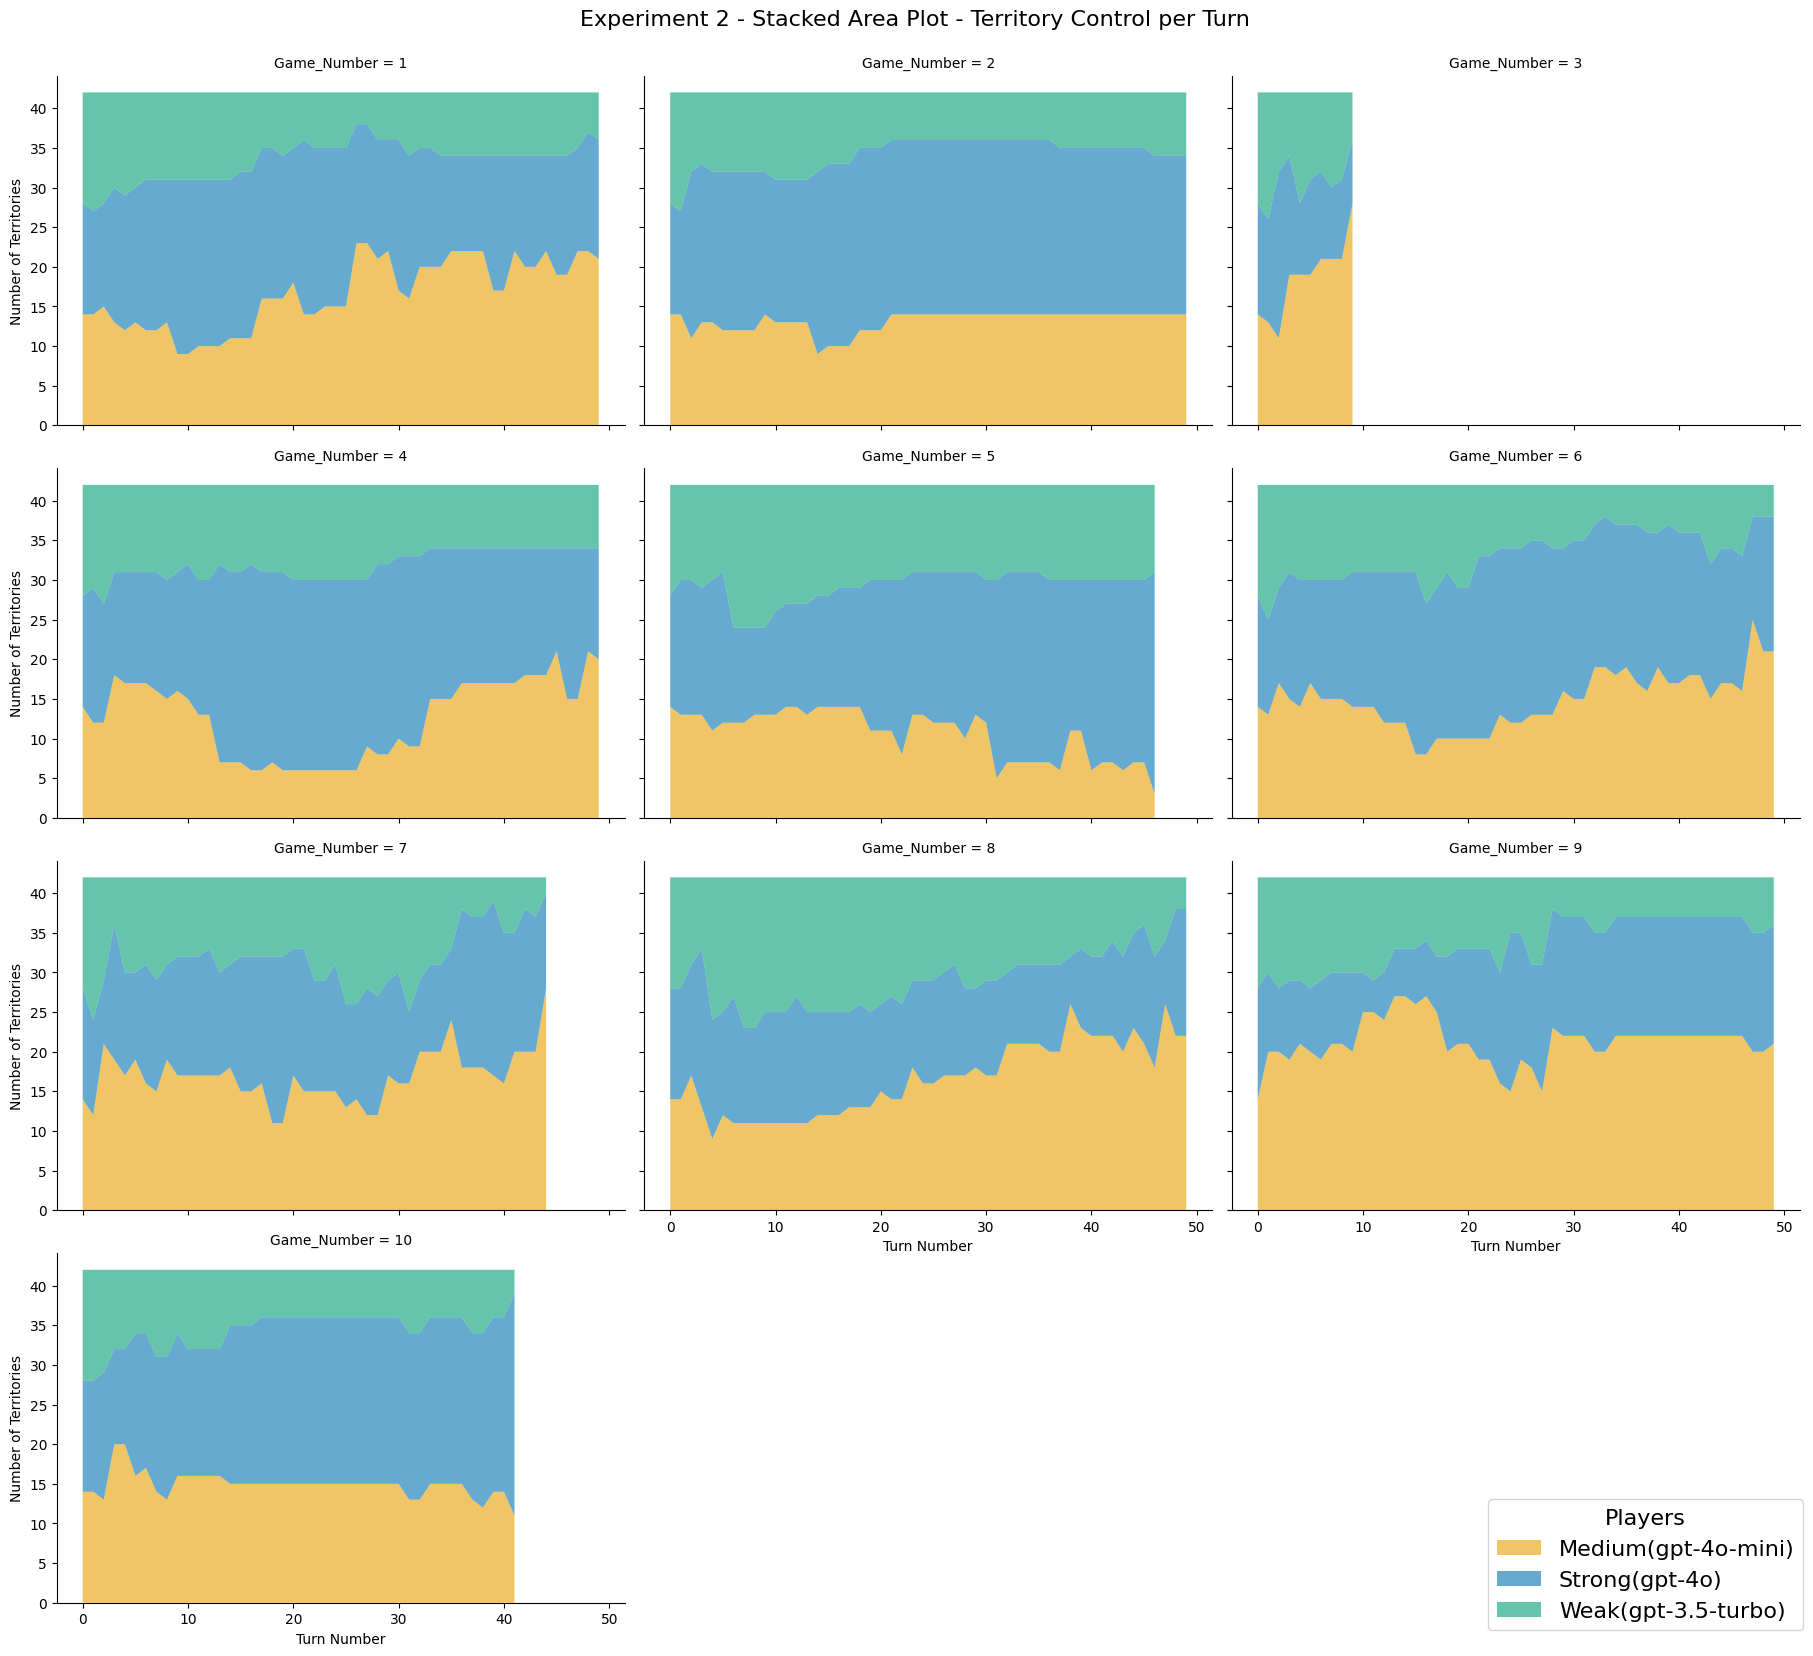

In [7]:
plot_many_stacked_area_charts(troops_and_territory_over_time_df,player_colors,"Experiment 2")

In [19]:
binomial_test_p_value(10, 1/3, 7)

0.019661636945587563

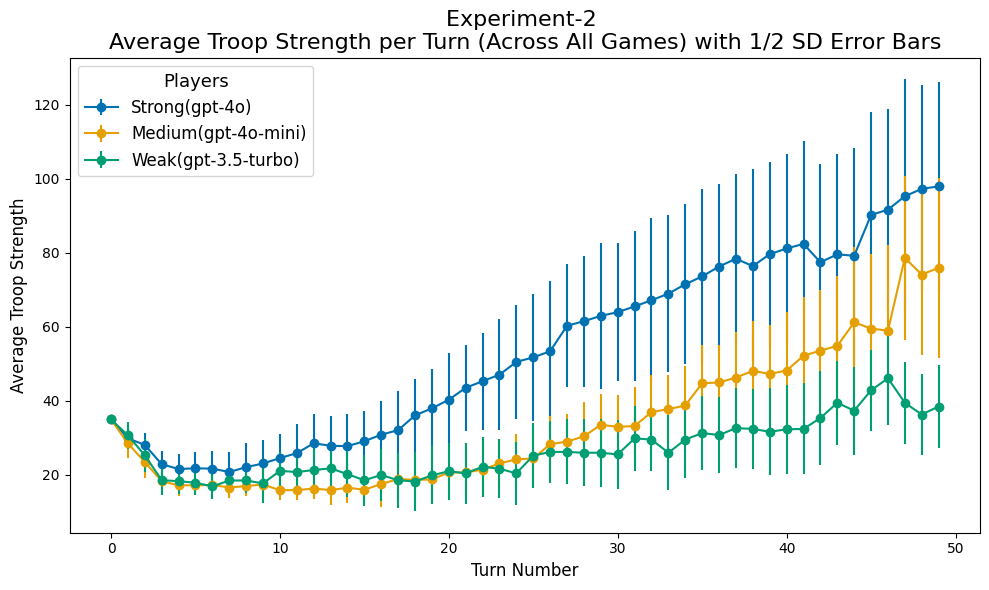

In [9]:
plot_average_troop_strength(troops_and_territory_over_time_df,player_colors, "Experiment-2")

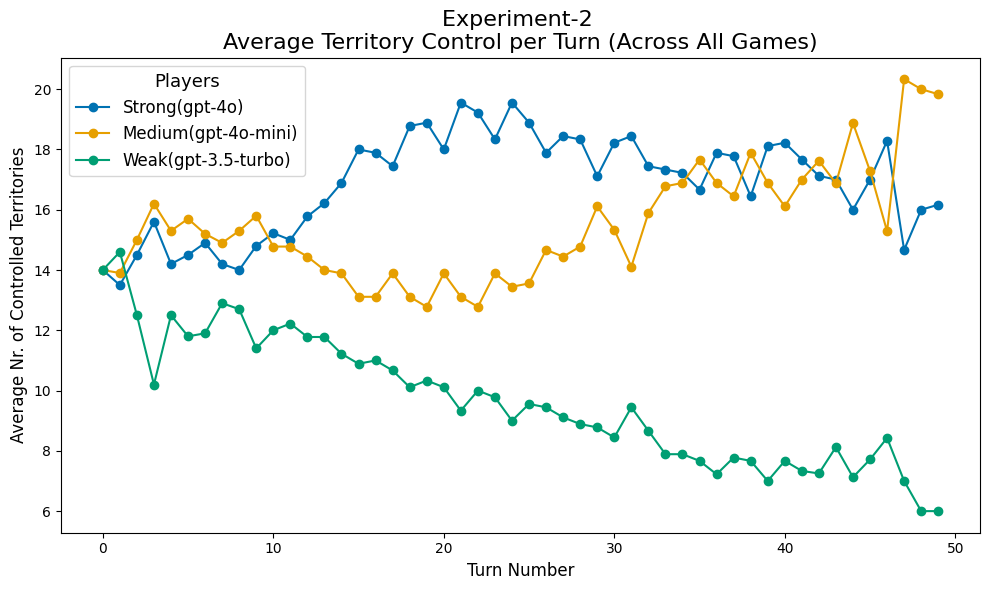

In [10]:
plot_average_territory_control(troops_and_territory_over_time_df, player_colors,"Experiment-2")

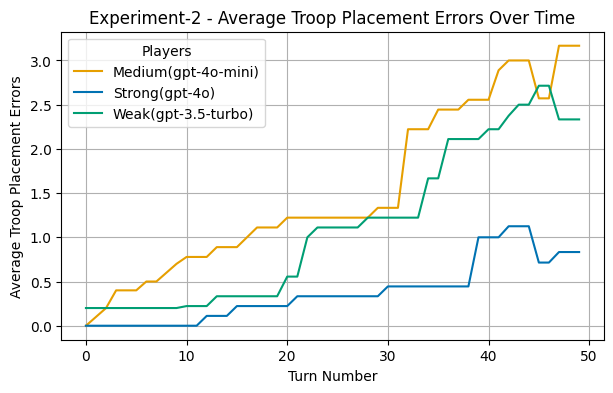

In [11]:
# Example usage:
plot_errors_over_time(experiment2_player_data_df, player_colors, 'Troop Placement Errors', "Experiment-2")

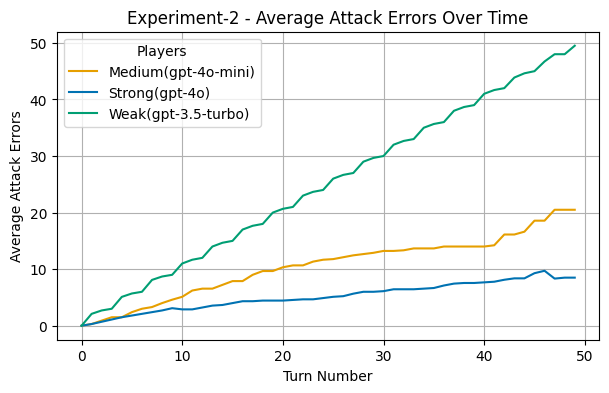

In [12]:
plot_errors_over_time(experiment2_player_data_df,player_colors, 'Attack Errors', "Experiment-2")


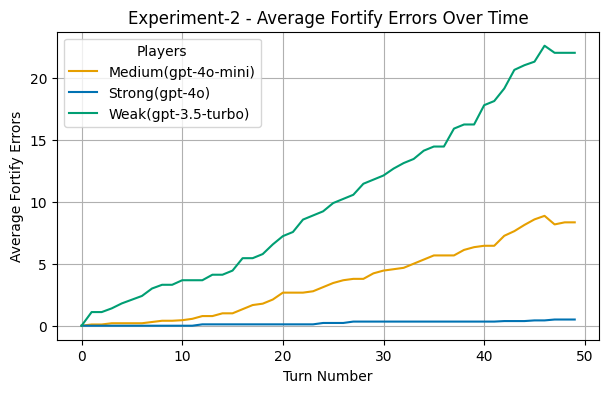

In [13]:
plot_errors_over_time(experiment2_player_data_df,player_colors, 'Fortify Errors', "Experiment-2")


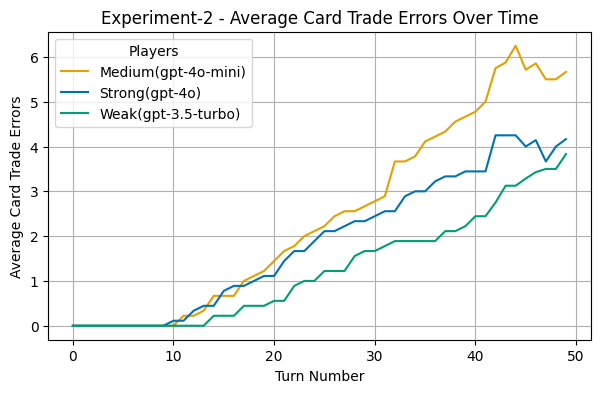

In [14]:
plot_errors_over_time(experiment2_player_data_df,player_colors, 'Card Trade Errors', "Experiment-2")

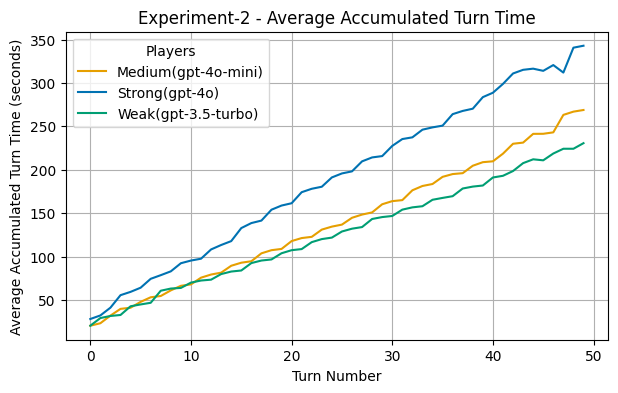

In [15]:

plot_accumulated_turn_time(experiment2_player_data_df,player_colors, "Experiment-2")


/app/game_analysis/visualizations.py:400: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_heatmap_data = heatmap_data.replace(player_to_numeric)
/app/game_analysis/visualizations.py:435: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_heatmap_data = heatmap_data.replace(player_to_numeric)
/app/game_analysis/visualizations.py:435: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-i

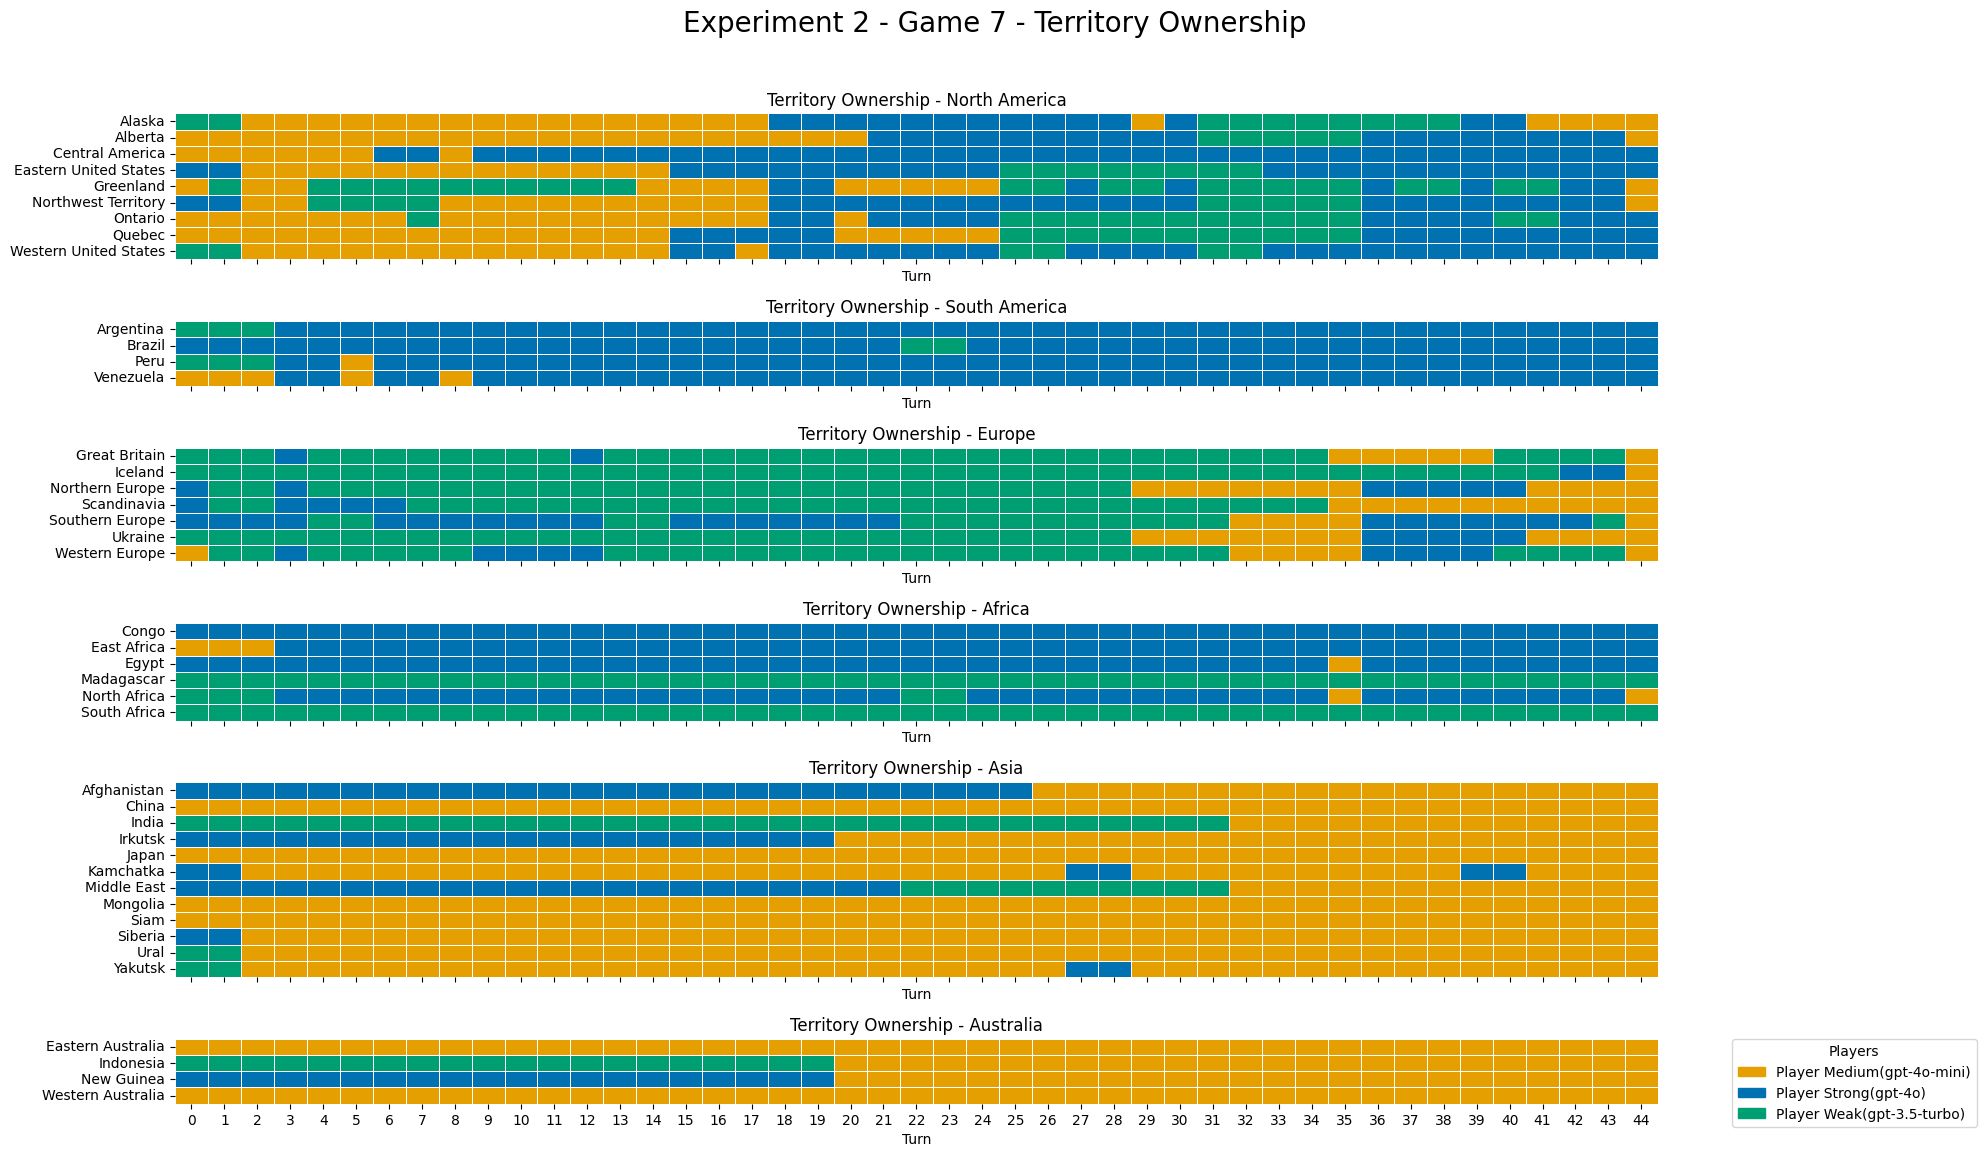

In [16]:
creat_full_heatmap_plot(experiment2_game_data_df, continent_mapping, player_colors, 7, "Experiment 2")

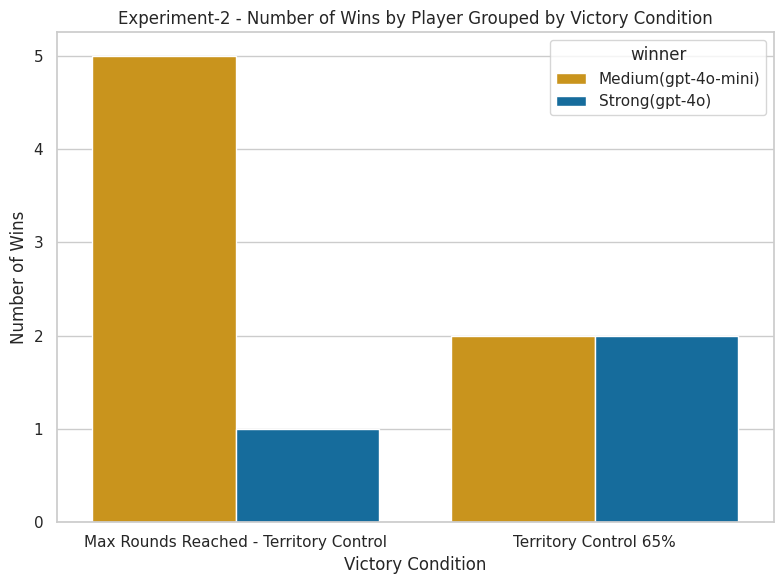

In [17]:
plot_wins_by_victory_condition(experiment_2_results_df,player_colors, "Experiment-2")
   
